# Classification Model From Mental Disorder Symptoms

This notebook will create a model from Mental Disorder Symptoms Datasets 
https://www.kaggle.com/datasets/baselbakeer/mental-disorders-dataset


**Disclaimer:**
This datasets claimed to be compiled of various sources
I'm going to use this for a test and learning purposes

I'm not claiming any reliability or accuracy of the model


**Dataset contributor:**
> baselbakeer

## What's inside the data

### Label
1. MDD
2. ASD
3. Loneliness
4. Bipolar
5. Anxiety
6. PTSD
7. Sleeping Disorder
8. Psychotic Depression
9. Eating Disorder
10. ADHD
11. PDD
12. OCD

## Preparing the Tools

In [1]:
#!pip install seaborn
#!pip install openpyxl

In [1]:
# Regular import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models req import
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Req
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Last Update
import time
print(f"Last Update: {time.asctime()}")

Last Update: Wed Aug 30 23:07:11 2023


## Loading the Data

In [2]:
# # Turning XlSX data into CSV
# df = pd.DataFrame(pd.read_excel("./datasets/Mental_disorder_symptoms.xlsx"))
# read_file = pd.read_excel("./datasets/Mental_disorder_symptoms.xlsx")
# read_file.to_csv("./datasets/Mental_disorder_symptoms.csv", index = None, header = True)

In [3]:
df = pd.DataFrame(pd.read_csv("./datasets/Mental_disorder_symptoms.csv"))
df.shape # rows, column

(637, 29)

## Data Exploratory

In [4]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [6]:
df.Disorder.value_counts()

Disorder
ASD                     89
anexiety                67
MDD                     65
eating disorder         65
ADHD                    65
PDD                     60
PTSD                    46
Loneliness              45
bipolar                 43
sleeping disorder       34
OCD                     31
psychotic deprission    27
Name: count, dtype: int64

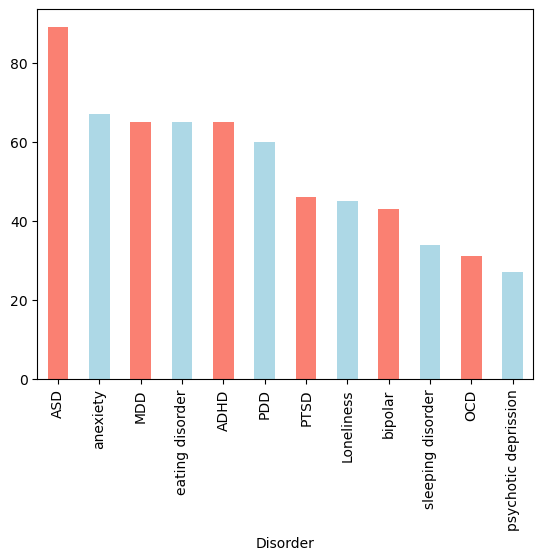

In [7]:
df.Disorder.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.describe()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000
mean,22.189953,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,...,0.459969,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769
std,8.395680,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,...,0.498787,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [9]:
df.Disorder.unique()

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

## Turning Each Disorder Labels into Number

In [10]:
df["label_disorder"] = pd.Categorical(df["Disorder"]).codes
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder,label_disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,MDD,3
1,14,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,ASD,1
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Loneliness,2
3,29,1,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,bipolar,8
4,32,1,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,anexiety,7


In [11]:
df.label_disorder.unique()

array([ 3,  1,  2,  8,  7,  6, 11, 10,  9,  0,  5,  4], dtype=int8)

In [12]:
# Mapping each Disorder to label
label_meaning = pd.DataFrame({"disorder":df.Disorder.unique(), "label_disorder":df.label_disorder.unique()}).sort_values(by=["label_disorder"])
label_meaning

,disorder,label_disorder
9,ADHD,0
1,ASD,1
2,Loneliness,2
0,MDD,3
11,OCD,4
10,PDD,5
5,PTSD,6
4,anexiety,7
3,bipolar,8
8,eating disorder,9


In [101]:
list(label_meaning.disorder.values)

['ADHD',
 'ASD',
 'Loneliness',
 'MDD',
 'OCD',
 'PDD',
 'PTSD',
 'anexiety',
 'bipolar',
 'eating disorder',
 'psychotic deprission',
 'sleeping disorder']

In [13]:
data = df.drop(["Disorder", "seasonally"], axis = 1)
data.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,label_disorder
0,23,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,3
1,14,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,8
4,32,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,7


In [14]:
data.dropna()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,label_disorder
0,23,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,3
1,14,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,8
4,32,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
633,27,1,0,1,0,0,0,0,1,1,...,1,1,0,1,1,1,0,0,0,5
634,19,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [15]:
data.label_disorder.value_counts()

label_disorder
1     89
7     67
3     65
9     65
0     65
5     60
6     46
2     45
8     43
11    34
4     31
10    27
Name: count, dtype: int64

### Correlation between each independent variables


In [16]:
corr_matrix = data.corr()
corr_matrix

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,label_disorder
ag+1:629e,1.000000,0.066112,0.168807,0.318004,0.168069,0.129277,-0.090120,0.085652,-0.183493,0.016253,...,-0.010384,0.037463,0.134136,-0.048258,-0.113989,1.685673e-01,0.316305,0.001259,-3.033195e-01,0.407955
feeling.nervous,0.066112,1.000000,-0.265346,0.475427,0.107370,0.007659,-0.258893,-0.258011,0.127216,-0.113463,...,0.083894,-0.105513,-0.008370,0.285178,-0.147114,1.392912e-01,-0.081312,0.031993,-1.157657e-01,0.201767
panic,0.168807,-0.265346,1.000000,0.236477,0.480517,0.302504,0.328807,0.501862,0.054834,0.417167,...,0.070446,0.409487,0.385318,-0.091250,-0.014483,3.176852e-03,0.212354,0.301141,-2.688751e-01,-0.097472
breathing.rapidly,0.318004,0.475427,0.236477,1.000000,0.450407,-0.065652,-0.010684,-0.060928,0.221749,0.237560,...,0.170998,0.225621,0.344413,0.404570,-0.339321,2.515607e-01,0.180176,0.006273,-6.048584e-01,0.291036
sweating,0.168069,0.107370,0.480517,0.450407,1.000000,-0.121303,0.107370,0.144637,-0.066251,0.143338,...,-0.046301,0.135150,0.178571,0.239896,-0.303964,-2.765395e-01,-0.118011,-0.114000,-4.187758e-01,0.263341
trouble.in.concentration,0.129277,0.007659,0.302504,-0.065652,-0.121303,1.000000,0.231595,0.251300,-0.209419,-0.178959,...,-0.197320,-0.165107,0.244785,-0.332679,0.297742,1.662832e-01,0.346978,0.170414,4.504708e-01,-0.024673
having.trouble.in.sleeping,-0.090120,-0.258893,0.328807,-0.010684,0.107370,0.231595,1.000000,0.270125,0.034346,0.005171,...,0.346210,0.012683,0.276900,-0.273432,-0.007464,5.568546e-02,0.253411,0.039204,1.324742e-01,0.147985
having.trouble.with.work,0.085652,-0.258011,0.501862,-0.060928,0.144637,0.251300,0.270125,1.000000,0.196654,0.071138,...,0.247173,0.064734,0.231565,0.064863,0.207735,-1.688748e-01,0.398580,-0.110855,-2.437886e-01,0.243128
hopelessness,-0.183493,0.127216,0.054834,0.221749,-0.066251,-0.209419,0.034346,0.196654,1.000000,0.324653,...,0.573729,0.317945,-0.207816,0.765370,0.397755,3.522908e-01,0.146107,-0.326015,-3.013263e-01,0.031710
anger,0.016253,-0.113463,0.417167,0.237560,0.143338,-0.178959,0.005171,0.071138,0.324653,1.000000,...,0.254123,0.989362,0.171413,0.159012,0.058037,3.219583e-01,0.087228,0.349117,-3.800245e-01,-0.281267


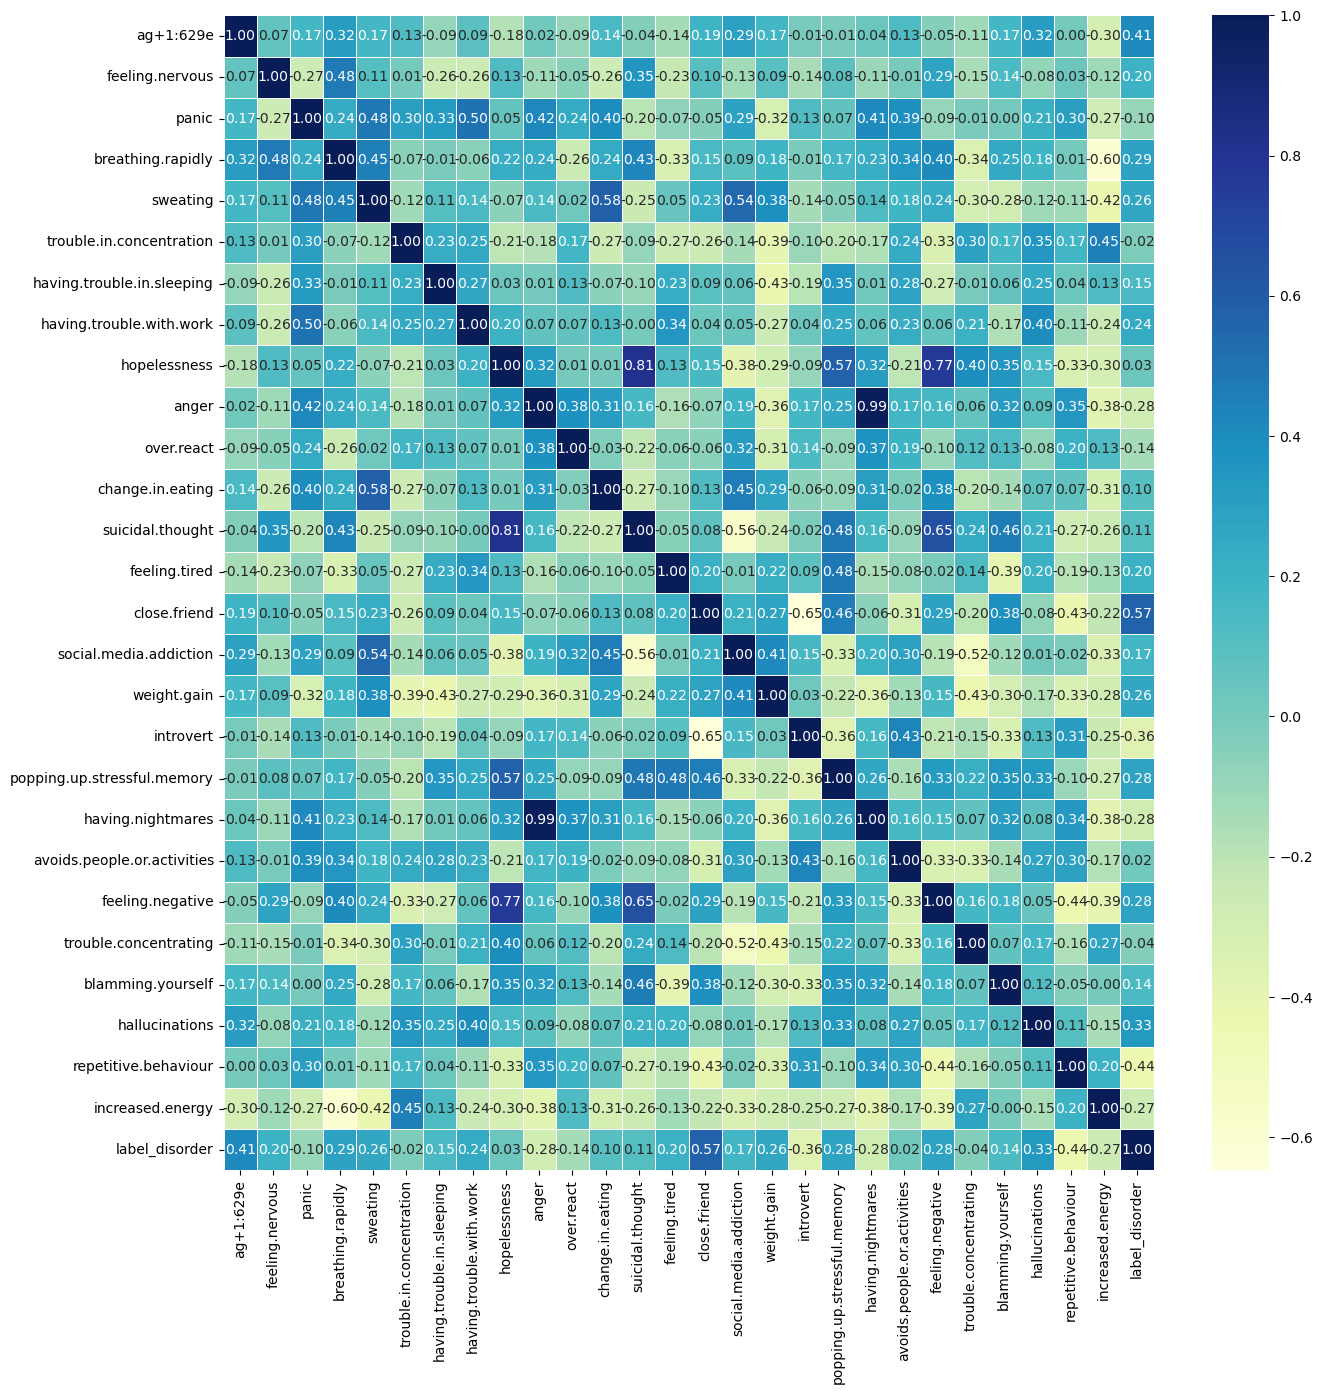

In [24]:
# Let's make it look a little prettier
corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Making a model

In [25]:
data.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,label_disorder
0,23,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,3
1,14,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,8
4,32,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,7


In [26]:
X = data.drop("label_disorder", axis = 1)
y = data.label_disorder.values

In [27]:
X.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy
0,23,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,14,1,0,1,0,0,1,0,0,1,...,1,0,1,1,0,0,0,0,1,0
2,25,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,32,1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
y

array([ 3,  1,  2,  8,  7,  6, 11, 10,  1,  9,  0,  1,  1,  0,  3,  5,  6,
        4,  9,  8, 11,  6,  4, 10,  2,  9,  5,  6,  9, 10,  1,  2,  6,  2,
        8, 11, 11,  7,  6,  3, 10, 10,  9,  8, 11,  1,  2,  1,  2,  0,  1,
        9,  8, 11,  7,  5,  5,  8,  7,  5, 10,  1,  9,  0,  1,  1,  7,  3,
        3,  0,  3,  1,  2,  8,  7,  7,  5,  5,  9,  7,  3,  3,  6,  4,  0,
        3,  1,  2,  8,  7,  6, 11, 10,  1,  9,  0,  1,  1,  7,  3,  3,  6,
        4,  9,  0,  0,  0,  4,  9,  1,  9,  8, 11,  6,  4,  9, 10,  1,  2,
        6,  2,  8,  2,  8,  7,  6,  1,  7,  3,  0,  1,  0,  7,  3,  5,  0,
        4,  9, 11,  7,  5,  5,  1,  2,  8,  7,  7,  5,  5,  9,  7,  3,  3,
       11, 11,  3,  0,  1,  1,  7,  3,  5,  6,  4,  9,  0,  5,  5,  9,  7,
        3,  3,  9,  5,  1,  2,  1,  2,  0,  1,  9,  8, 11,  7,  5,  5,  8,
        7,  5, 10,  1,  9,  0,  1,  1,  7,  3,  0,  1,  0,  7,  3,  5,  0,
        4,  8,  7,  7,  5,  5,  9,  7,  3,  3,  6,  4,  0,  3,  1,  2,  8,
        7,  6, 11, 10,  1

### Train and Test Split

In [29]:
# Random Seed
np.random.seed(23)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [30]:
X_train.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy
371,37,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
581,19,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
529,16,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
415,19,1,0,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
351,32,1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
y_train, len(y_train)

(array([ 9,  5,  8,  7,  7,  1,  6,  7,  5,  2,  1,  8,  5,  1,  9, 10,  0,
         1,  5,  8, 11,  9,  2,  5,  1,  1,  3,  8,  6,  0,  8,  5,  7,  9,
         9,  0,  7,  1,  2,  1,  9,  4,  8,  8,  7,  9,  7,  5,  3, 10,  2,
         1,  5,  8,  6,  5, 10,  0,  9,  0,  0,  5,  2,  5,  1,  9,  7,  0,
         6,  1,  6,  5,  2, 10,  0,  8,  5,  7,  0,  3,  1,  3,  4,  1,  8,
         9,  6,  1,  0,  2,  0,  1,  0,  5,  6,  9,  9,  4,  2,  8,  3,  1,
         4,  6,  0,  0,  0,  1,  9,  9,  1, 11,  9,  3,  6,  0,  8,  0,  3,
         0,  0, 11,  5,  9,  7,  0,  1,  6,  2,  8,  1,  3,  9,  7,  2,  9,
         6,  3,  3,  9,  2,  0, 11,  7,  6,  8,  8,  7,  2,  3, 11,  1, 11,
         1,  6,  0,  2,  6,  9,  3,  5,  5,  1,  5,  8,  3,  8,  4,  4,  4,
         2,  2,  3,  5,  1,  5,  0,  9,  7,  0,  7,  3,  0, 11,  2,  1,  2,
         5,  5,  5,  1,  7,  0,  2,  2,  1,  6,  6, 11,  5,  1, 10,  0,  7,
         0, 11, 11,  7,  2,  0,  6,  1,  7,  7,  2,  1,  7,  8,  1,  7, 11,
        10, 

### Choosing the training process

<img src="https://scikit-learn.org/stable/_static/ml_map.png"></img>

1. Logistic Regression -  `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

### KNeighbors

In [36]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[0.9882121807465619,
 0.9882121807465619,
 0.9862475442043221,
 0.9666011787819253,
 0.9705304518664047,
 0.9666011787819253,
 0.9469548133595285,
 0.925343811394892,
 0.9115913555992141,
 0.899803536345776,
 0.9017681728880157,
 0.8860510805500982,
 0.8860510805500982,
 0.8821218074656189,
 0.8605108055009824,
 0.8546168958742633,
 0.8506876227897839,
 0.831041257367387,
 0.831041257367387,
 0.8153241650294696]

Maximum KNN score on the test data: 98.44%


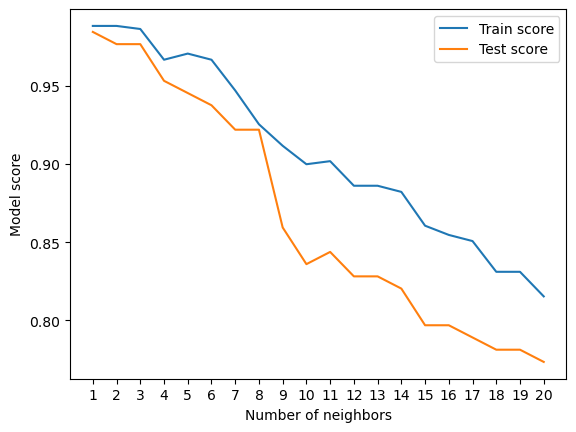

In [38]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Logistic Regression

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [44]:
# Setup random seed
np.random.seed(23)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [46]:
rs_log_reg.score(X_test, y_test)

0.9921875

In [55]:
# Grid Search

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [56]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 62.10169418915616, 'solver': 'liblinear'}

In [57]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9921875

### RandomForest

In [39]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [48]:
# Setup random seed
np.random.seed(23)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);



Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [49]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [50]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9921875

### Making prediction

In [62]:
# Logistic Regression
y_preds = gs_log_reg.predict(X_test)
y_preds

array([ 7,  2,  3,  3,  0,  3,  2,  5, 10,  5,  1, 11,  3,  3,  9,  6,  3,
        6,  3,  5,  3,  3,  0, 10,  1, 10,  1,  1,  1,  6,  7,  0,  6,  1,
        4, 10,  7,  9, 11,  4,  1,  9,  1,  0,  3,  3,  1,  7,  3,  1, 11,
        0,  4,  7,  7,  9,  7,  7,  3,  8,  7,  6,  1,  7,  7,  2,  5,  3,
        9,  3,  9,  0,  1,  3,  5,  0,  6,  6,  4,  7, 11,  4,  3,  2,  8,
        7,  6,  1,  7,  1,  5,  8,  9,  8, 11,  0,  7,  2,  9,  9,  6, 10,
        0,  5,  0,  1,  1,  8,  1,  6,  3,  5,  9,  2,  5, 10,  0,  7, 10,
        6, 11,  1,  4,  3,  2,  1,  2,  7], dtype=int8)

In [63]:
y_test

array([ 7,  2,  3,  3,  0,  3,  2,  5, 10,  5,  1, 11,  3,  3,  9,  6,  3,
        6,  3,  5,  3,  3,  0, 10,  1, 10,  1,  1,  1,  6,  7,  0,  6,  1,
        4, 10,  7,  9, 11,  4,  1,  9,  1,  0,  3,  3,  1,  7,  3,  1, 11,
        0,  4,  7,  7,  9,  7,  7,  3,  8,  7,  6,  1,  7,  7,  2,  5,  3,
        9,  3,  9,  0,  1,  3,  5,  0,  6,  6,  4,  7, 11,  4,  3,  2,  8,
        7,  6,  1,  7,  1,  5,  8,  9,  8, 11,  0,  7,  2,  9,  9,  6, 10,
        0,  5,  0,  1,  1,  8,  1,  6,  3,  5,  9,  2,  3, 10,  0,  7, 10,
        6, 11,  1,  4,  3,  2,  1,  2,  7], dtype=int8)

In [65]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6]]


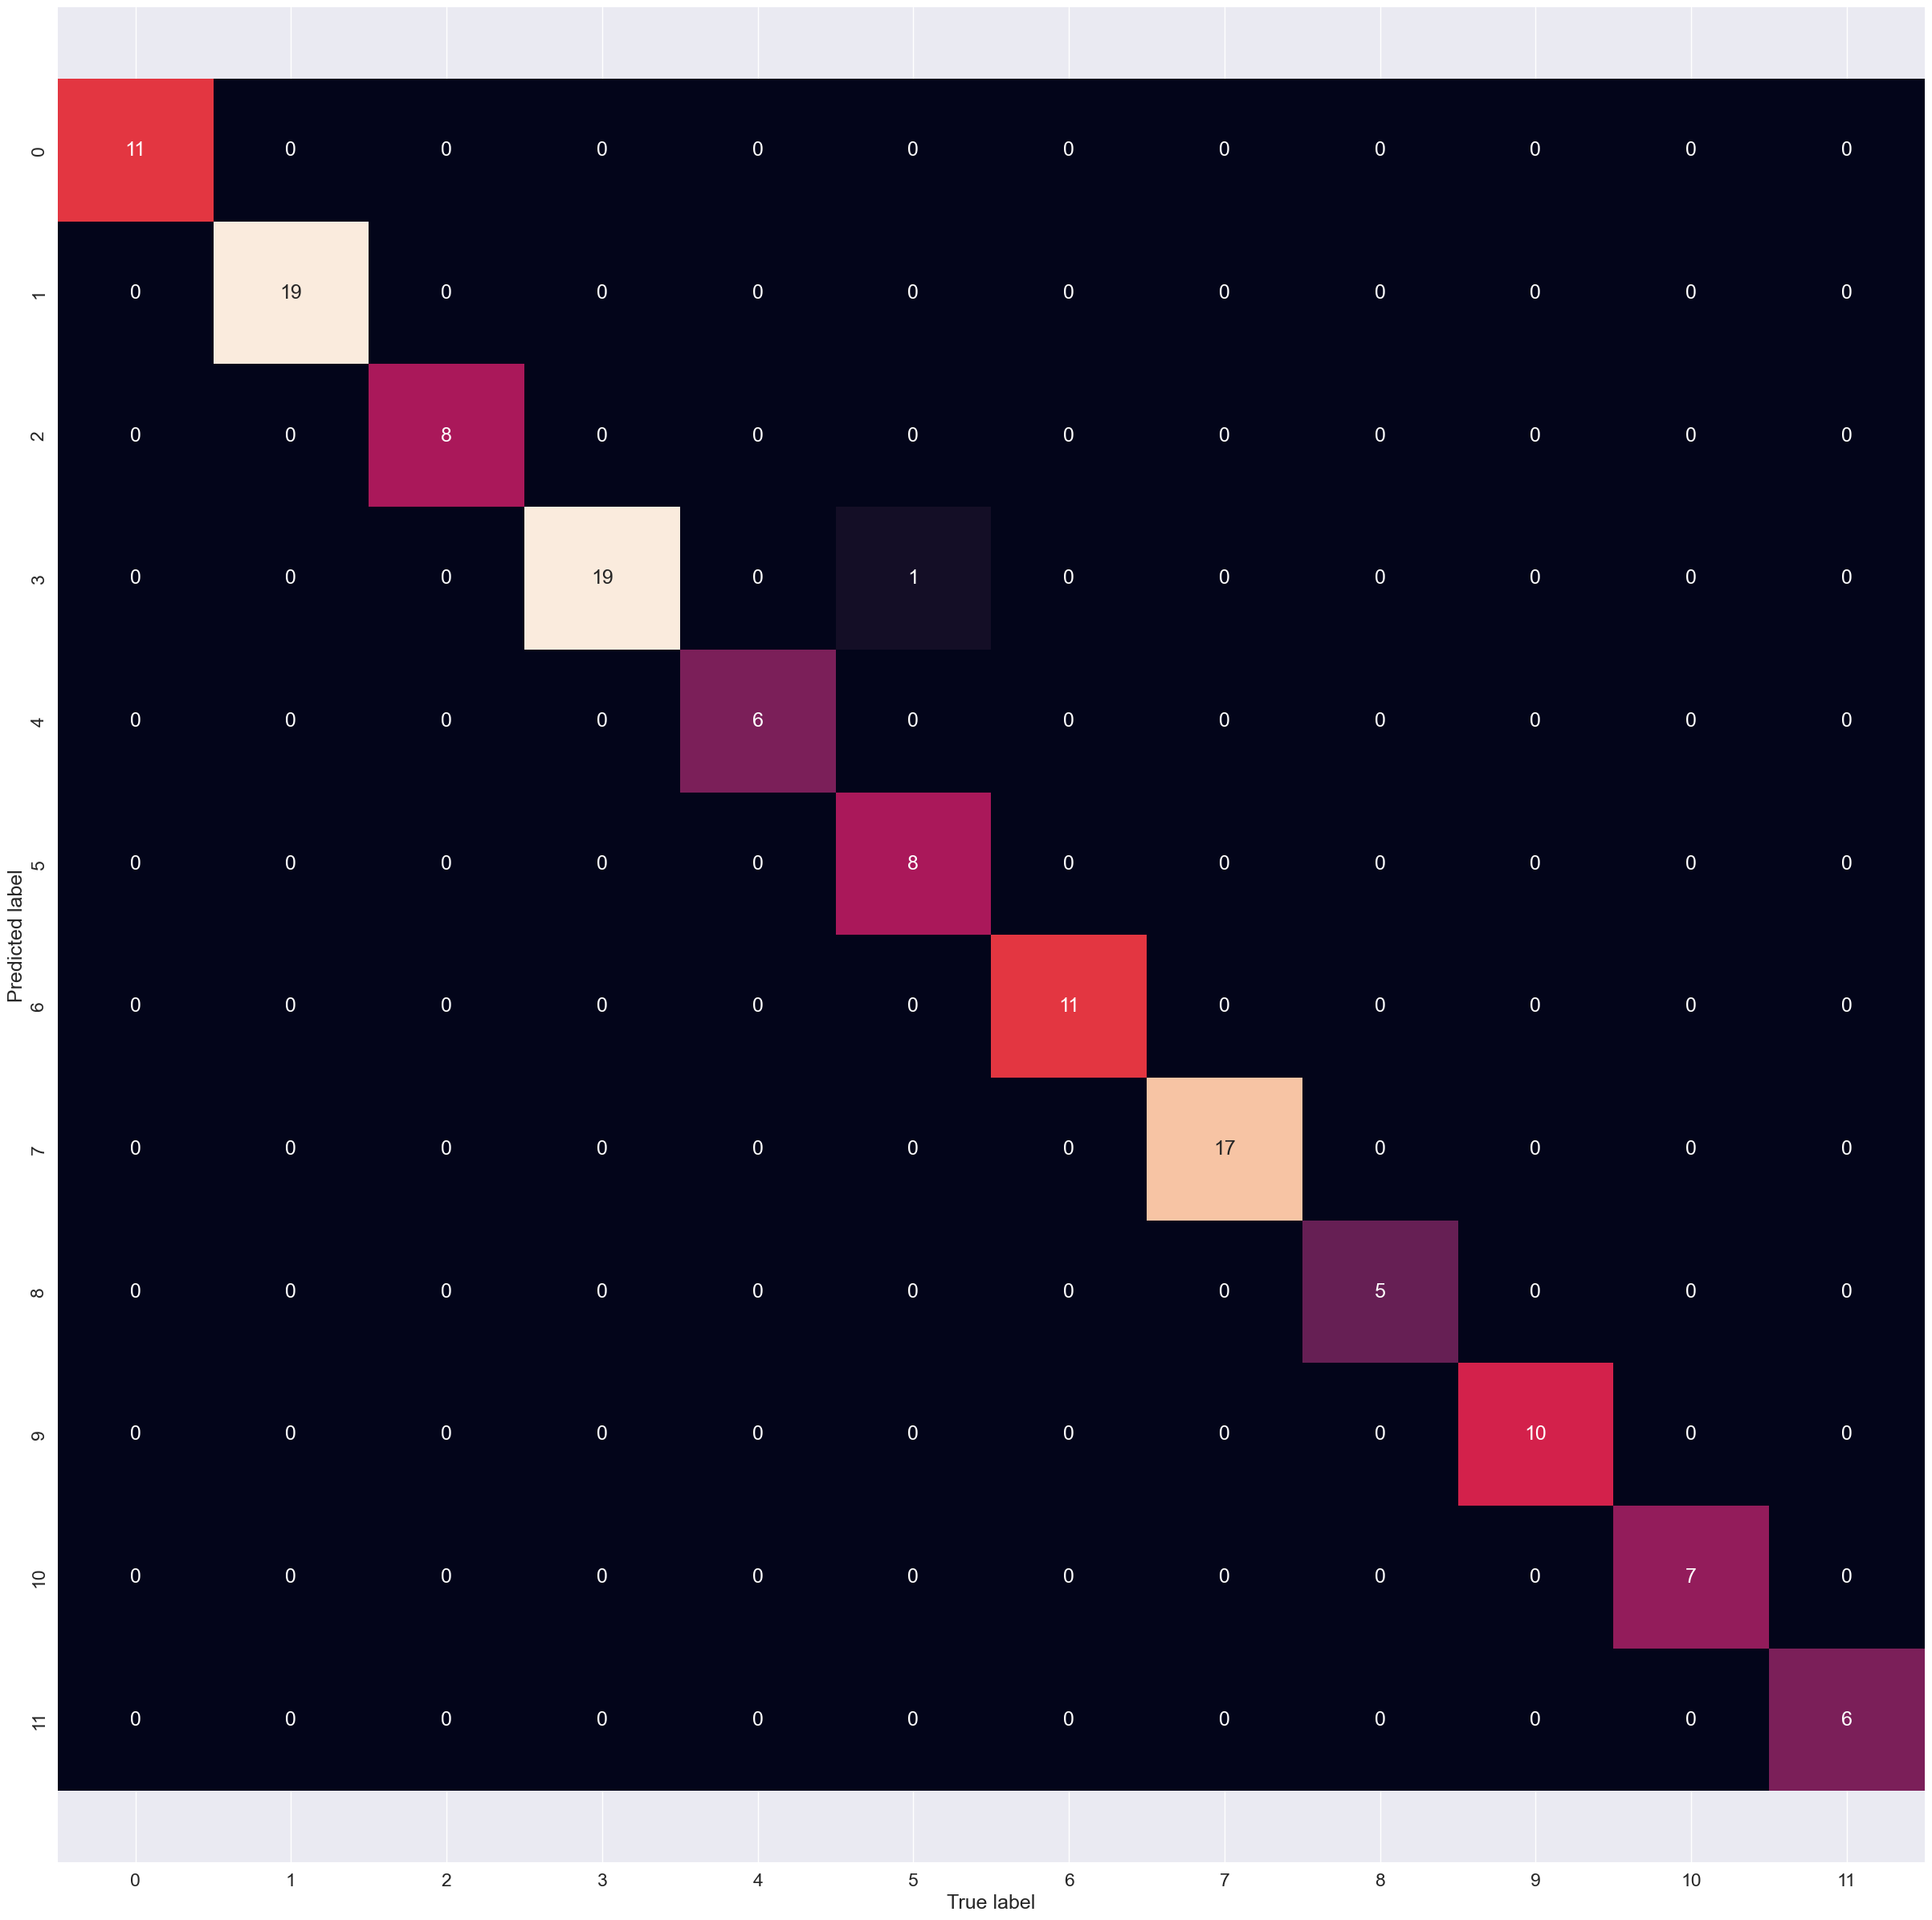

In [67]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00         6
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6

    accuracy                           0.99       128
   macro avg       0.99      1.00      0.99       128
weighted avg       0.99      0.99      0.99       128



## Feature Importance

In [71]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=62.10169418915616,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [74]:
clf.coef_

array([[-7.84691895e-02, -4.69316357e-01, -1.94713795e+00,
        -8.84069211e-01, -1.93342054e-01,  2.92509505e+00,
        -5.93564676e-01, -1.98469920e+00, -3.31150781e-01,
        -2.82186624e-01, -3.59427894e+00, -1.70119064e-01,
        -3.21920804e-01, -1.85886379e+00, -3.80155302e+00,
        -2.16104392e+00, -2.29715148e-01, -2.25891299e+00,
        -2.03911030e+00, -3.03498627e-01, -2.09273803e+00,
        -4.76357482e-01,  2.56495779e+00, -1.88420909e+00,
        -9.14045332e-02,  2.43427913e-01,  1.92399693e+00],
       [-1.17780841e-01, -1.62315012e+00,  2.48679904e+00,
         4.65389901e-01, -2.52076958e-01, -1.80432187e+00,
        -1.85058437e+00, -1.61250687e+00, -1.00770014e+00,
         1.57383384e+00,  2.83235588e+00,  4.35257928e-01,
        -8.78950030e-01, -1.98078787e+00, -3.16494195e+00,
        -1.69984193e+00, -1.00322456e+00,  3.21650407e+00,
        -1.76837852e+00,  1.57368912e+00,  3.91235696e+00,
        -1.22875784e+00, -4.82531553e-01, -1.47407527e+

In [76]:
data.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,label_disorder
0,23,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,3
1,14,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,8
4,32,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,7


In [77]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'ag+1:629e': -0.07846918945021528,
 'feeling.nervous': -0.469316357158513,
 'panic': -1.9471379462043814,
 'breathing.rapidly': -0.8840692106171593,
 'sweating': -0.19334205374008978,
 'trouble.in.concentration': 2.925095047256756,
 'having.trouble.in.sleeping': -0.5935646762204028,
 'having.trouble.with.work': -1.9846991981931683,
 'hopelessness': -0.331150780829813,
 'anger': -0.28218662352266216,
 'over.react': -3.594278940718834,
 'change.in.eating': -0.1701190635082216,
 'suicidal.thought': -0.32192080404854695,
 'feeling.tired': -1.8588637928669847,
 'close.friend': -3.801553024676933,
 'social.media.addiction': -2.161043916364454,
 'weight.gain': -0.22971514825130346,
 'introvert': -2.2589129881517995,
 'popping.up.stressful.memory': -2.0391102966449104,
 'having.nightmares': -0.30349862698028685,
 'avoids.people.or.activities': -2.0927380283079513,
 'feeling.negative': -0.4763574818027464,
 'trouble.concentrating': 2.564957794718693,
 'blamming.yourself': -1.8842090870969235,


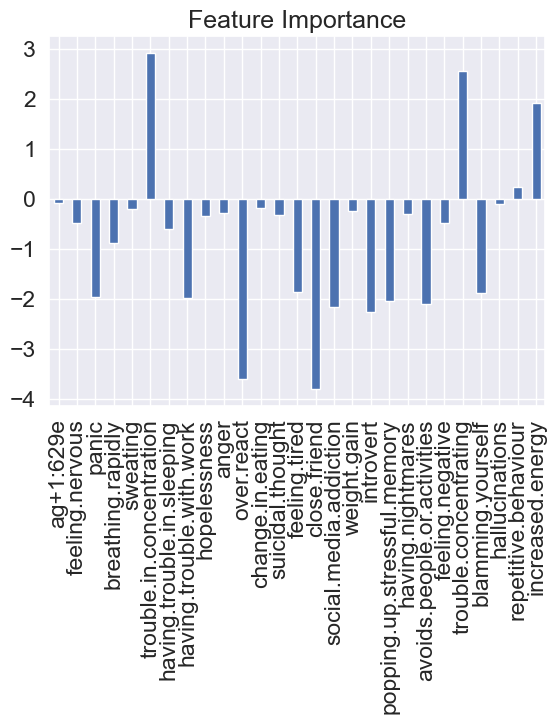

In [78]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Saving the model

In [20]:
import pickle

In [82]:
#Random Forest
filename = "MHSC_RF.sav"
pickle.dump(rs_rf, open(filename, "wb"))

In [83]:
#Logistic Regression
filename_log = "MHSC_LogReg.sav"
pickle.dump(gs_log_reg, open(filename_log, "wb"))

## Load Model

In [21]:
# Random Forest
loaded_model = pickle.load(open("MHSC_RF.sav", "rb"))

In [106]:
header = list(X_train.columns.values)
len(test2)

27

In [108]:
test = pd.DataFrame({
    'score': [True,0,0,False,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    'column': header
})
test_data= test.set_index('column').transpose()

In [109]:
loaded_model.predict(test_data)[0]

2